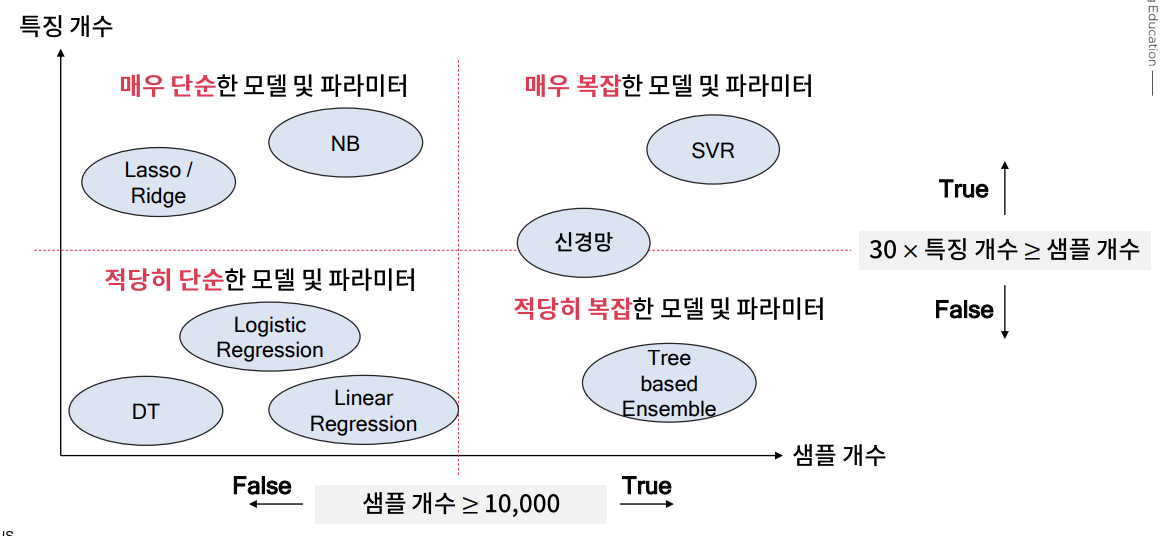

In [1]:
import os
os.chdir(r'C:\Users\신상훈\Desktop\preprocessing\part-3.-지도학습-주요모델-및-개념\Part 3. 지도학습 주요모델 및 개념\데이터')

#### 데이터 크기에 따른 모델 선택: 특징 개수가 매우 적은 경우

In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv("Combined_Cycle_Power_Plant.csv")
df.shape

(9568, 5)

In [3]:
df.head()

,T,V,AP,RH,EP
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [4]:
# 특징과 라벨 분리
X = df.drop('EP', axis = 1)
Y = df['EP']

In [5]:
# 모델 리스트 정의
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR

# 공정한 비교를 위해 전부 default 값을 사용
# random_state가 있는 모델은 모두 같은 값으로 설정

SVR_model = SVR()
MLP_model = MLP(random_state = 100)
LR_model = LR()
DTR_model = DTR(random_state = 100)
RFR_model = RFR(random_state = 100)
KNR_model = KNR()

model_list = [SVR_model, MLP_model, LR_model, DTR_model, RFR_model, KNR_model]
model_name_list = ['SVR', 'MLP', 'LR', 'DTR', 'RFR', 'KNR']

In [6]:
# 모델별 k겹 교차 검증 기반(k = 5)의 MAE값 계산
from sklearn.model_selection import cross_val_score
for (model, model_name) in zip(model_list, model_name_list):
    score = -cross_val_score(model, X, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean() # -MAE이므로 다시 -를 붙인 것
    print(model_name, score)

SVR 11.15624063928403
MLP 3.942187462994771
LR 3.6282513807290444
DTR 3.0464405292720267
RFR 2.365834244467129
KNR 2.9176435395285303


#### 샘플이 매우 적고, 특징이 상대적으로 많은 경우

In [7]:
# 데이터 불러오기
import pandas as pd
df = pd.read_csv("baseball.csv")

In [8]:
df.shape

(337, 17)

In [9]:
# 특징과 라벨 분리
X = df.drop('Salary', axis = 1)
Y = df['Salary']

In [10]:
# 모델 리스트 정의
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.linear_model import LinearRegression as LR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.neighbors import KNeighborsRegressor as KNR

# 공정한 비교를 위해 전부 default 값을 사용
# random_state가 있는 모델은 모두 같은 값으로 설정

SVR_model = SVR()
MLP_model = MLP(random_state = 100)
LR_model = LR()
DTR_model = DTR(random_state = 100)
RFR_model = RFR(random_state = 100)
KNR_model = KNR()

model_list = [SVR_model, MLP_model, LR_model, DTR_model, RFR_model, KNR_model]
model_name_list = ['SVR', 'MLP', 'LR', 'DTR', 'RFR', 'KNR']

In [11]:
# 모델별 k겹 교차 검증 기반(k = 5)의 MAE값 계산
# SVR의 성능이 최악
# MLP에서 max_iter 이슈 발생
from sklearn.model_selection import cross_val_score
for (model, model_name) in zip(model_list, model_name_list):
    score = - cross_val_score(model, X, Y, cv = 5, scoring = 'neg_mean_absolute_error').mean() # -MAE이므로 다시 -를 붙인 것
    print(model_name, score)

SVR 940.1650397834104


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

MLP 710.1436141313577
LR 539.5671145383958
DTR 573.3383230904303
RFR 467.4962985074626
KNR 651.0923792800702
